# Tarea 6: Integración con Taylor

Fecha de envío del PR inicial: **viernes 5 de mayo**

Fecha de aceptación del PR: **martes 16 de mayo, antes de la clase**

---

## Ejercicio 1

Usando su implementación de polinomios de Taylor, escriban un integrador para la ecuación diferencial que se desarrolló en este ejemplo, esto es, $\dot{x} = x^2$ con la condición inicial $x(0) = 3$. 

El integrador debe hacer las operaciones necesarias para obtener automáticamente los coeficientes $x_{[k]}$, *en cada paso de integración*, a partir de la condición inicial local. Un requisito básico para esto es que tengan una implementación de la función $P_\alpha(x) = [g(x)]^\alpha$ con $g(x)$ un polinomio de Taylor, que hicieron en la "Tarea5", y que funcione bien en particular para `alpha::Int`.

La implementación debe consistir de varias funciones: 

- Una función donde se calculen los coeficientes $x_{[k]}$ de la expansión. Esta función deberá llamar a otra donde se implementan las recurrencias que imponen las ecuaciones de movimiento.

- Una función donde se obtenga el paso de integración $h$ como se describió en el notebook 10.

- Otra función donde se haga la suma usando el método de Horner.

- Finalmente, una función que combine las funciones anteriores para hacer la integración desde un tiempo inicial a uno final. En este punto, *fingiremos ignorancia*, en el sentido de  que el tiempo inicial es cero, y el tiempo final será $0.5$ (que está más allá de donde la solución está definida).


Dado que conocemos la solución analítica de este problema, grafiquen como función de $t$ el error relativo de su integrador (respecto al valor del resultado analítico).

---

## Ejercicio 2

Repitan la integración del ejercicio anterior usando el método de Runge-Kutta de 4o orden con paso de integración fijo (que es lo más sofisticado que conocen hasta ahora) y comparen los resultados del error relativo con los obtenidos con el método de Taylor. En particular, finjan ignorancia de la misma manera que en el ejercicio anterior.

In [1]:
"""
se hará el método de runge-kutta para resolver una ecuación diferencial de la forma dx/dt=f(x,t),
considerando el valor de una condicion inicial en t_0, con cierto número de pasos, y cierto valor en x_0
"""
function runge_kutta_4(f,t_0,x_0,n)
    t_f=0.1
    a=zeros(n+1) #"t"
    b=zeros(n+1) #"x"
    h=(t_f-t_0)/n
    a[1]=t_0
    b[1]=x_0
    for i in 1:n
        k_1=f(a[i],b[i])     #condiciones necesarias para definir el siguiente valor de "t" y de "x"
        k_2=f(a[i]+(h*(1/2)),b[i]+((1/2)*((k_1)*h)))
        k_3=f(a[i]+(h*(1/2)),b[i]+((1/2)*((k_2)*h)))
        k_4=f(a[i]+h,b[i]+((k_3)*h))
        b[i+1]=a[i]+(1/6)*(h)*(k_1+2*k_2+2*k_3+k_4)
        a[i+1]=a[i]+h
    end
    return a,b
end

runge_kutta_4

In [2]:
f(x,y)=y^2

f (generic function with 1 method)

In [3]:
R=runge_kutta_4(f,0,3,10000)

([0.0,1.0e-5,2.0e-5,3.0e-5,4.0e-5,5.0e-5,6.0e-5,7.0e-5,8.0e-5,9.0e-5  …  0.09991,0.09992,0.09993,0.09994,0.09995,0.09996,0.09997,0.09998,0.09999,0.1],[3.0,9.00027e-5,1.0e-5,2.0e-5,3.0e-5,4.0e-5,5.0e-5,6.0e-5,7.0e-5,8.0e-5  …  0.0999001,0.0999101,0.0999201,0.0999301,0.0999401,0.0999501,0.0999601,0.0999701,0.0999801,0.0999901])

In [7]:
typeof(ans)

Tuple{Array{Float64,1},Array{Float64,1}}

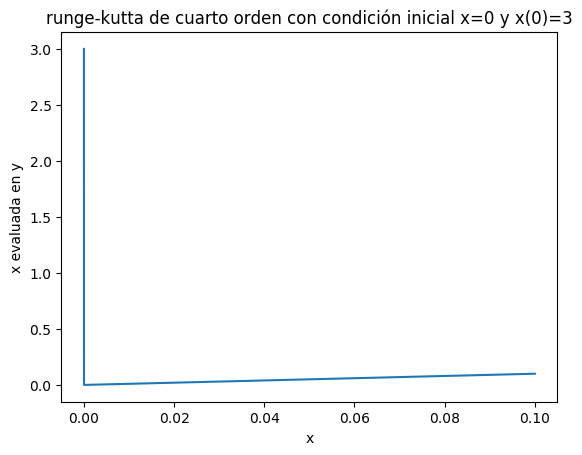

In [4]:
using PyPlot
plot(R[1],R[2])
title("runge-kutta de cuarto orden con condición inicial x=0 y x(0)=3")
xlabel("x")
ylabel("x evaluada en y")
show()

---

## Ejercicio 3

Integra la ecuación de movimiento para el oscilador armónico, $\ddot{x} = -2x$, con $x(0)=2$, $\dot{x}(0)=0$, durante 10^4 periodos de oscilación (o sea, hasta $t_f = 10^4 \cdot 2\pi/\sqrt{2}$, usando el método de Taylor y el método de Runge-Kutta de 4o orden con paso de integración constante. Compara cómo cambia la energía (respecto al valor al tiempo cero) en función del tiempo en ambos métodos.

In [6]:
function runge_kutta_4_2(f,t_0,x_0,y_0,n)   #se aumenta un elemento más en la función de runge kutta, pero en principio es lo mismo
    t_f=(10e4*2*pi)/(sqrt(2))
    h=((t_f)-(t_0))/n
    t=zeros(n+1)
    x=zeros(n+1)
    y=zeros(n+1)
    t[1]=t_0
    x[1]=x_0
    y[1]=y_0
    k(t,x,y)=y
    g(t,x,y)=f(t,x)
    for i in 1:n
        k_1=g(t[i],x[i],y[i])    #las condiciones para definir "x", "y" y "yprima"
        m_1=k(t[i],x[i],y[i])
        k_2=g(t[i]+((1/2)*h),x[i]+((k_1)*(1/2)*h),y[i]+((m_1)*(1/2)*h))
        m_2=k(t[i]+((1/2)*h),x[i]+((k_1)*(1/2)*h),y[i]+((m_1)*(1/2)*h))
        k_3=g(t[i]+((1/2)*h),x[i]+((k_2)*(1/2)*h),y[i]+((m_2)*(1/2)*h))
        m_3=k(t[i]+((1/2)*h),x[i]+((k_2)*(1/2)*h),y[i]+((m_2)*(1/2)*h))
        k_4=g(t[i]+h,x[i]+((k_3)*h),y[i]+((m_3)*h)) 
        m_4=k(t[i]+h,x[i]+((k_3)*h),y[i]+((m_3)*h))
        t[i+1]=t[i]+h
        x[i+1]=x[i]+(1/6)*(k_1+k_2+k_3+k_4)*h
        y[i+1]=y[i]+(1/6)*(m_1+m_2+m_3+m_4)*h
    end
    return x,y
end

runge_kutta_4_2 (generic function with 1 method)

In [7]:
g(x,t)=-2x

g (generic function with 1 method)

In [8]:
runge_kutta_4_2(g,0,2,0,1000)

([2.0,-1.31593e5,-5.26377e5,-1.18435e6,-2.10551e6,-3.28987e6,-4.73741e6,-6.44814e6,-8.42206e6,-1.06592e7  …  -1.29237e11,-1.29498e11,-1.29759e11,-1.3002e11,-1.30282e11,-1.30544e11,-1.30806e11,-1.31069e11,-1.31332e11,-1.31595e11],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])